<a href="https://colab.research.google.com/github/samanthajmichael/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall -y numba numpy
#!pip uninstall -y scipy

%%capture
!pip uninstall -y piml
!pip install -U piml
#!pip install --upgrade numba numpy
#!pip install --upgrade scipy

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
import pandas as pd
from piml import Experiment
from piml.models import XGB2Classifier
import matplotlib.pyplot as plt

exp = Experiment()
data = pd.read_csv('https://github.com/shrutibalan4591/South-German-Credit-Risk-Classification/raw/main/Data/German_credit.csv')

exp.data_loader(data=data)
exp.data_summary(feature_exclude=["amount", "savings", "employment_duration", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker"], silent=True)
exp.data_prepare(target="credit_risk", task_type="classification", silent=True)

# Train Model without monotonicity
exp.model_train(model=XGB2Classifier(), name='XGB2')

# Train Model with monotonicity constraints on duration
exp.model_train(model=XGB2Classifier(mono_decreasing_list=("duration", )), name="Mono-XGB2")

(CVXPY) Jun 18 05:35:39 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 18 05:35:39 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


#Partial Dependency Plots for both train and test data for XGB2 and Mono-XGB2

## View the saved composite plots in the file folder in the left sidebar.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

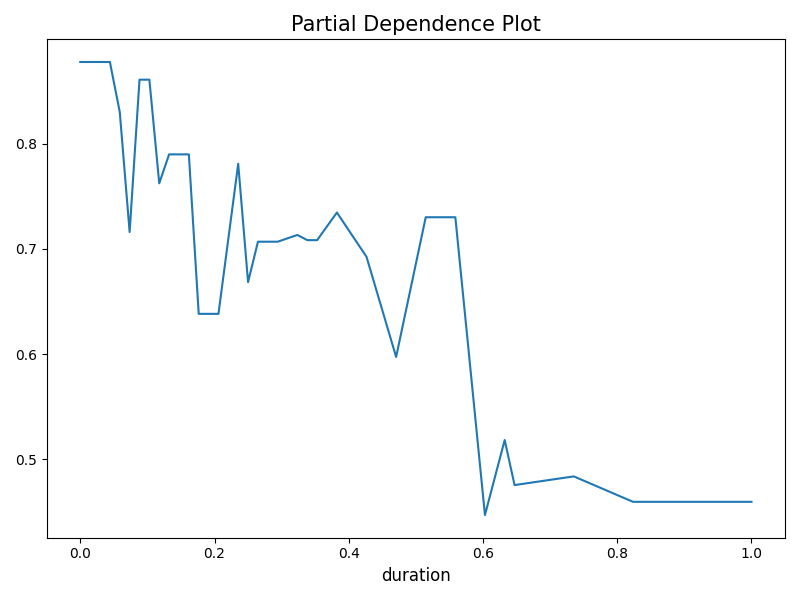

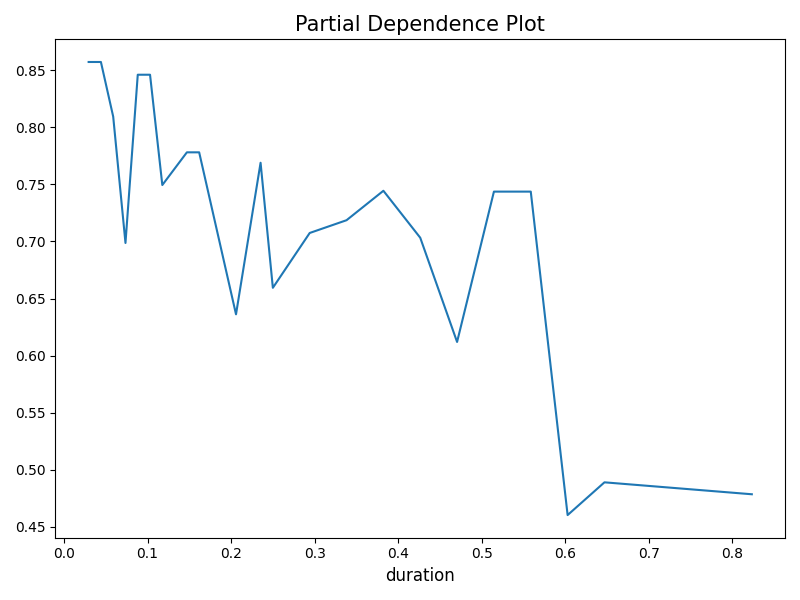

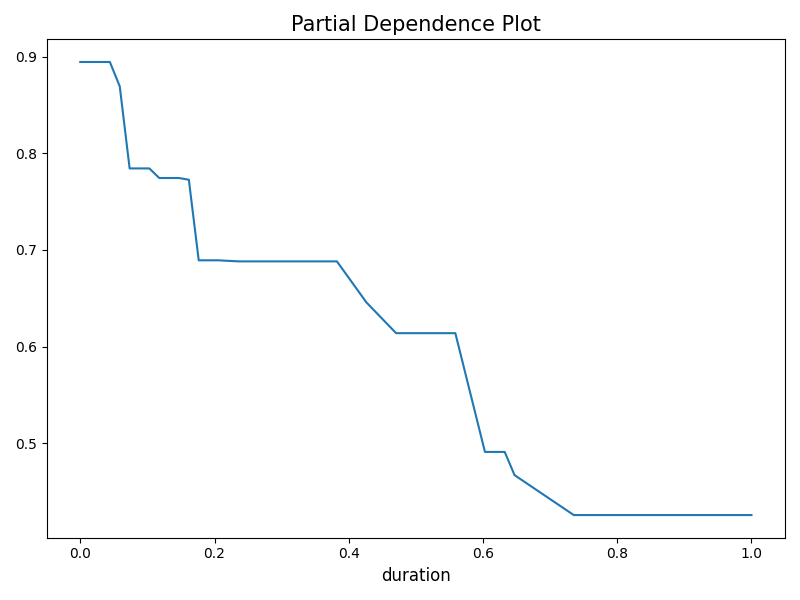

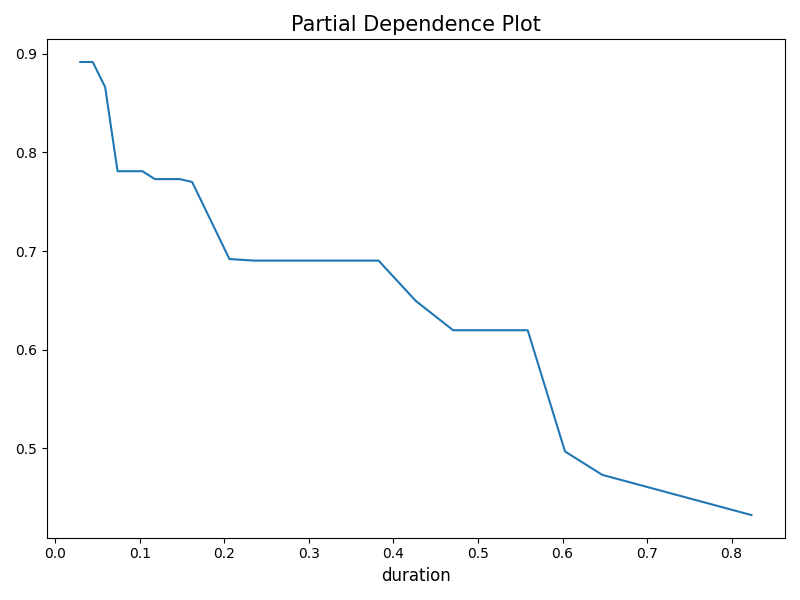

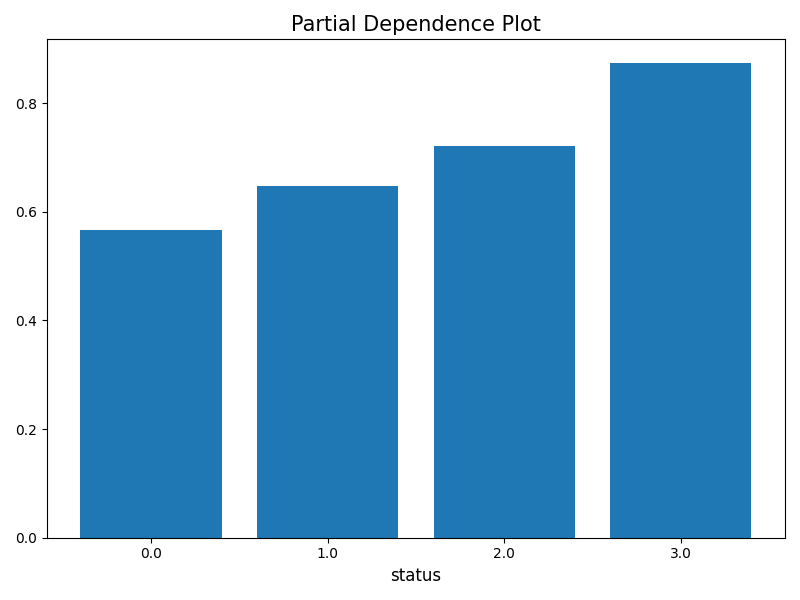

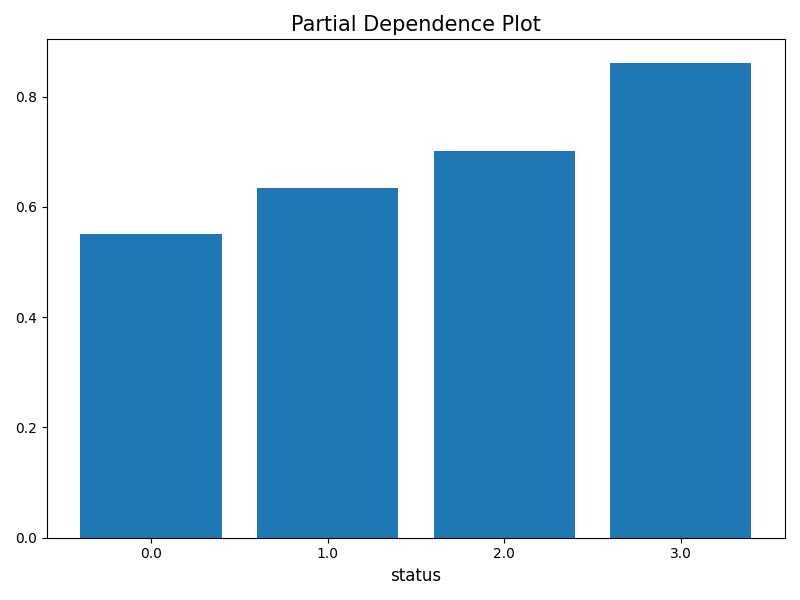

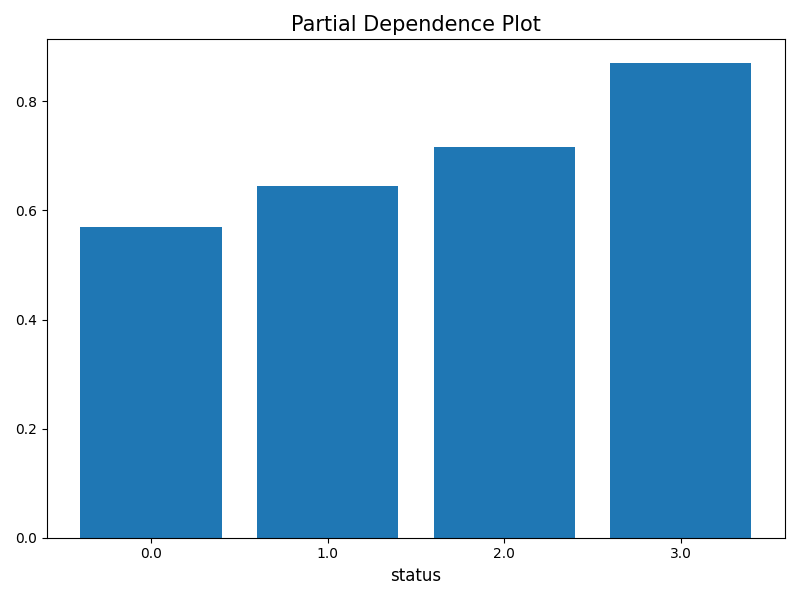

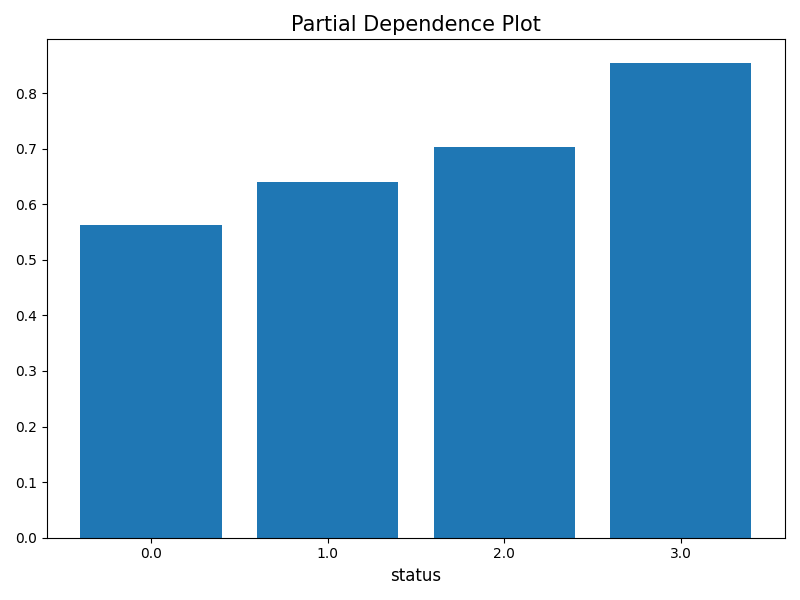

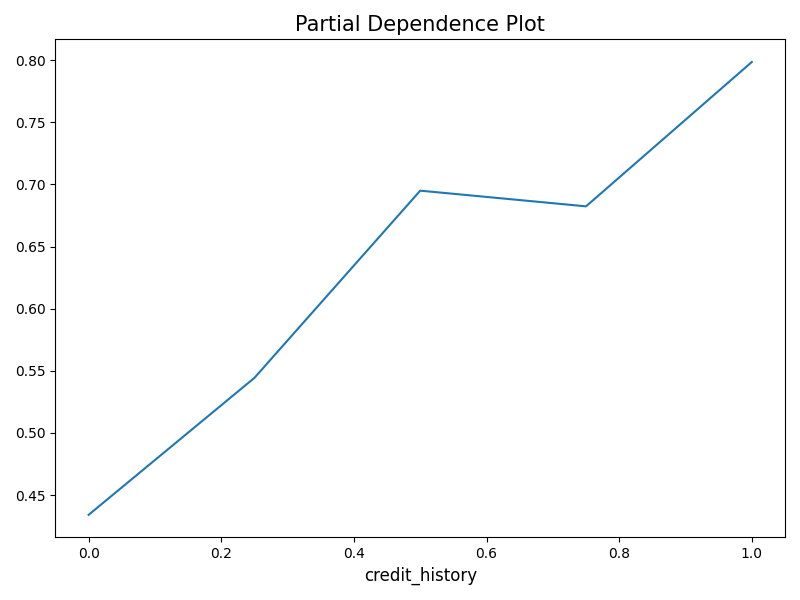

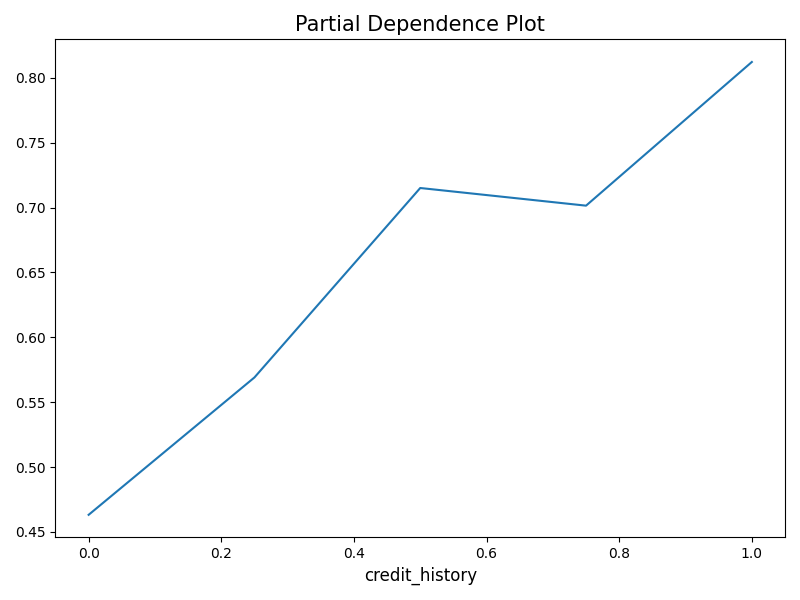

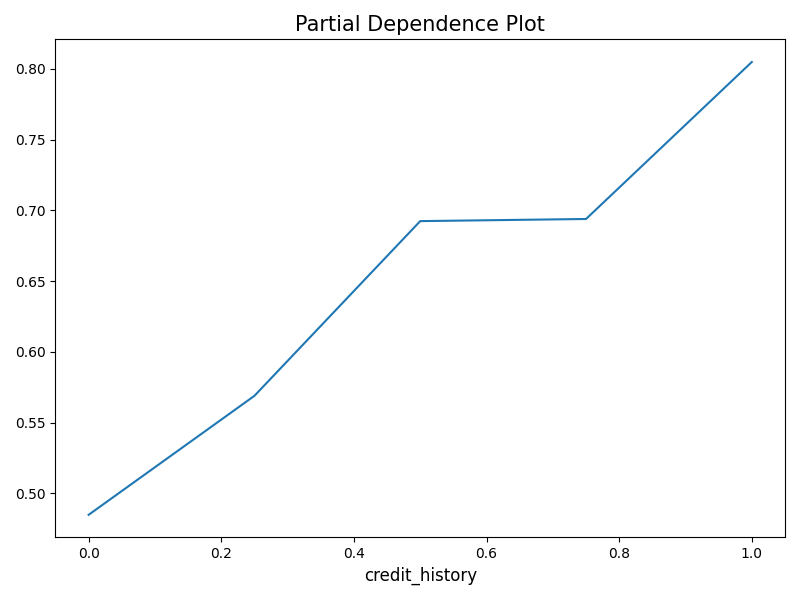

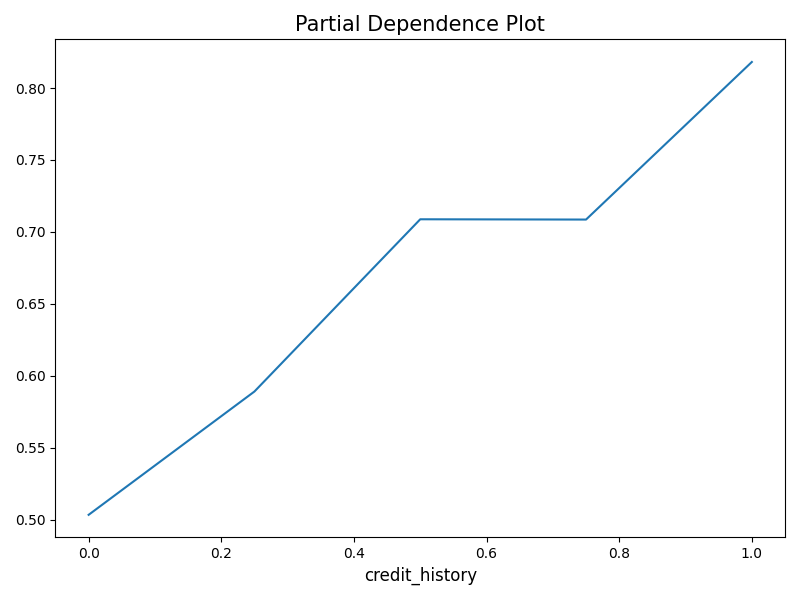

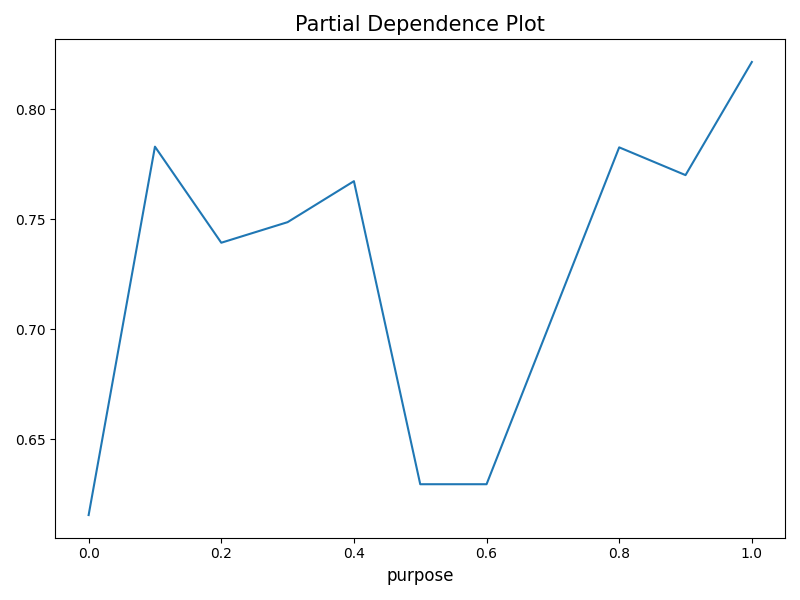

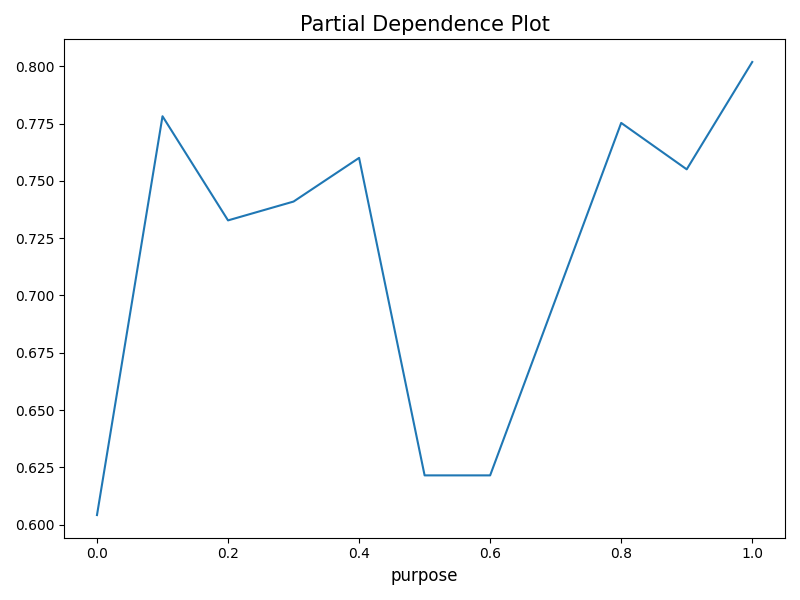

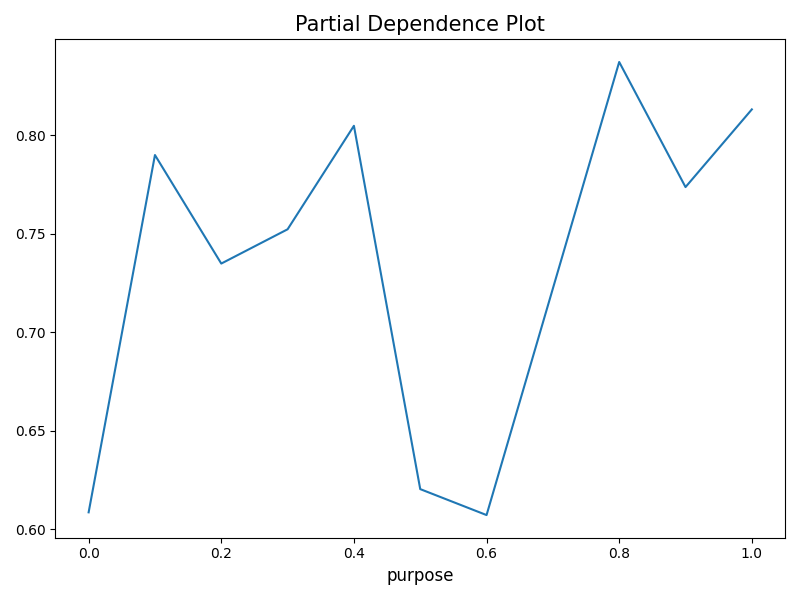

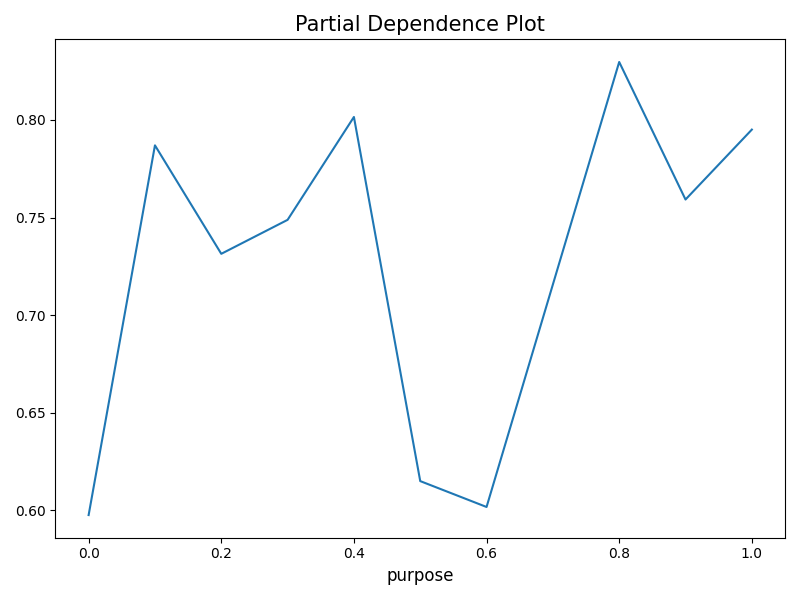

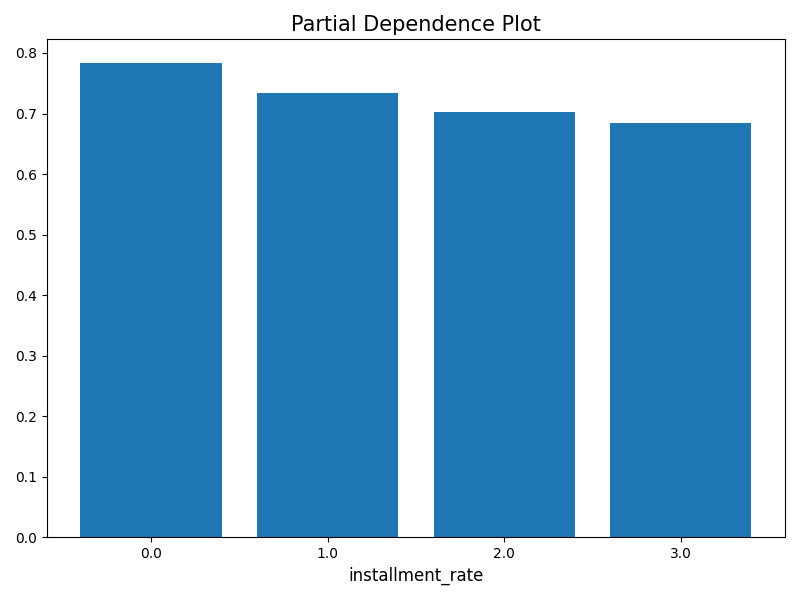

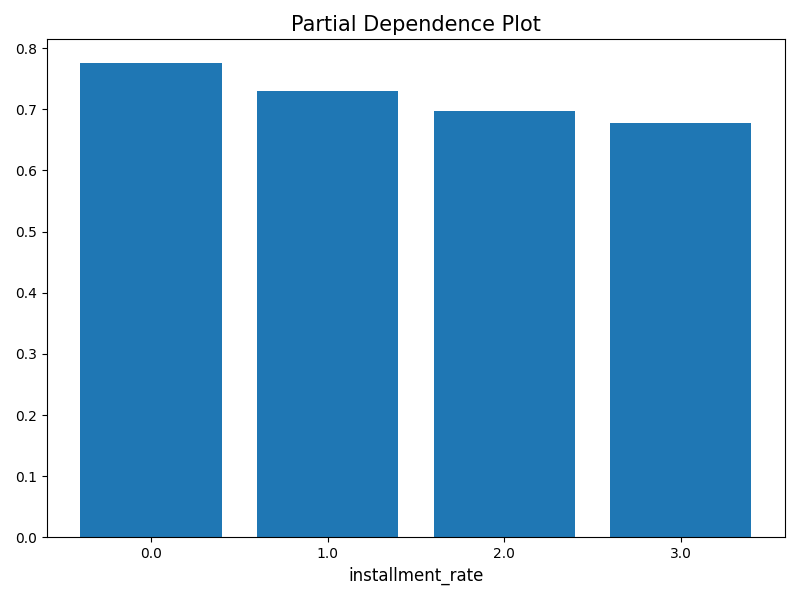

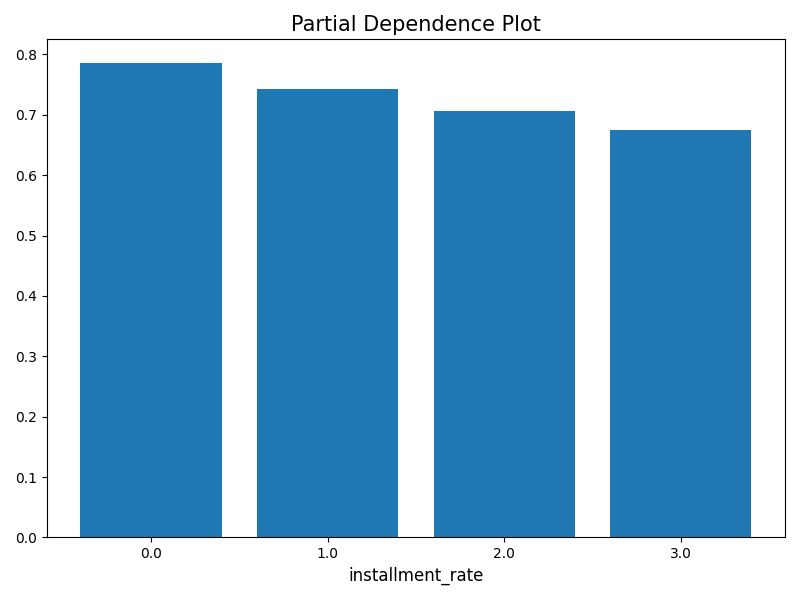

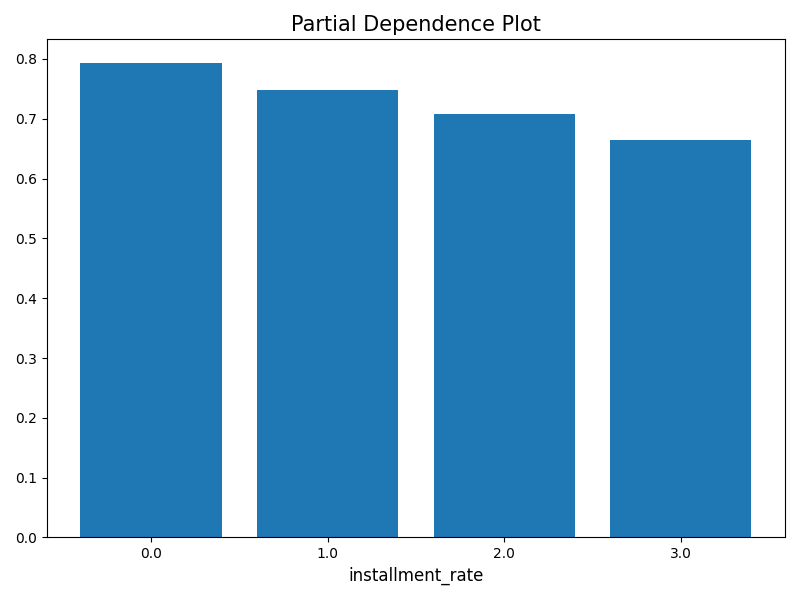

In [ ]:
# Function to extract and plot PDPs for both models on the same graph
def plot_pdp_combined(exp, feature):
    # Get PDP data for XGB2 and Mono-XGB2 for both train and test data
    pdp_xgb2_train = exp.model_explain(model="XGB2", show="pdp", uni_feature=feature, use_test=False, return_data=True).data
    pdp_xgb2_test = exp.model_explain(model="XGB2", show="pdp", uni_feature=feature, use_test=True, return_data=True).data
    pdp_mono_xgb2_train = exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=feature, use_test=False, return_data=True).data
    pdp_mono_xgb2_test = exp.model_explain(model="Mono-XGB2", show="pdp", uni_feature=feature, use_test=True, return_data=True).data

    # Extract PDP values
    values_xgb2_train = pdp_xgb2_train
    values_xgb2_test = pdp_xgb2_test
    values_mono_xgb2_train = pdp_mono_xgb2_train
    values_mono_xgb2_test = pdp_mono_xgb2_test

    # Plot the PDPs on the same graph
    fig, ax = plt.subplots(figsize=(8, 6))

    # Training data plots
    ax.plot(values_xgb2_train[feature], values_xgb2_train['values'], label='XGB2 (Train)', color='blue', linestyle='-')
    ax.plot(values_mono_xgb2_train[feature], values_mono_xgb2_train['values'], label='Mono-XGB2 (Train)', color='red', linestyle='--')

    # Test data plots
    ax.plot(values_xgb2_test[feature], values_xgb2_test['values'], label='XGB2 (Test)', color='purple', linestyle='-', alpha=0.7)
    ax.plot(values_mono_xgb2_test[feature], values_mono_xgb2_test['values'], label='Mono-XGB2 (Test)', color='green', linestyle='--', alpha=0.7)

    ax.set_xlabel(feature)
    ax.set_ylabel('Partial Dependence')
    ax.set_title(f'Partial Dependence of {feature}')
    ax.legend()

    # Save plot as JPG
    fig.savefig(f'{feature}_pdp.jpg', dpi=300)  # dpi parameter controls image resolution
    plt.close(fig)  # Close the figure to free up memory

# List of features to plot
features = ["duration", "status", "credit_history", "purpose", "installment_rate"]

# Plot combined PDPs for each feature
for feature in features:
    plot_pdp_combined(exp, feature)


#Model 1 - XGB2 - Diagnosis

##Accuracy

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8013,0.8453,0.8674,0.4305,0.1399
Test,0.7400,0.7827,0.8207,0.5341,0.1751
Gap,-0.0613,-0.0626,-0.0467,0.1036,0.0352


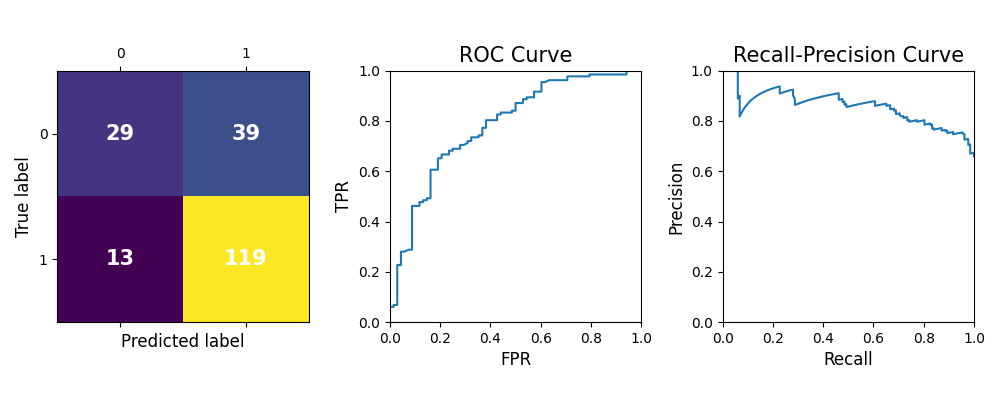

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_table")
exp.model_diagnose(model="XGB2", show="accuracy_plot", figsize=(10, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

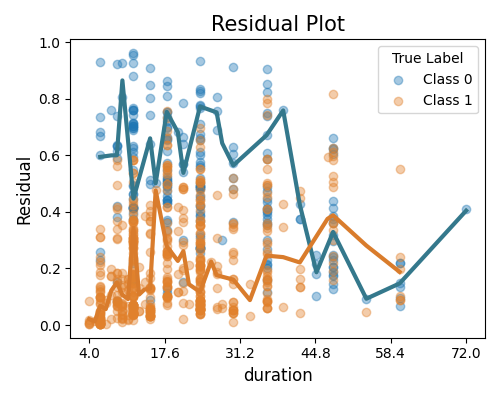

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

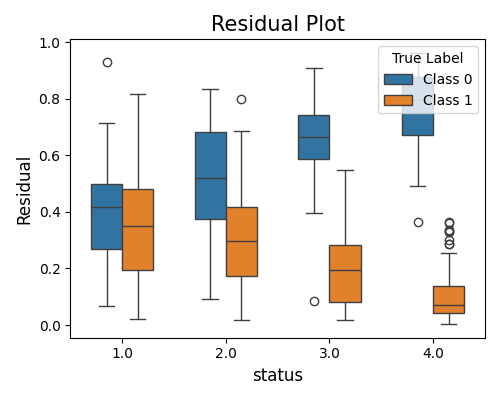

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="status",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

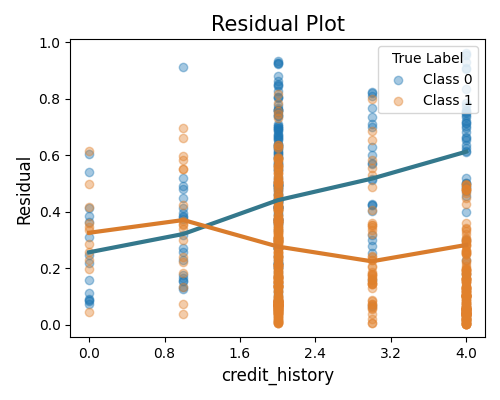

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="credit_history",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

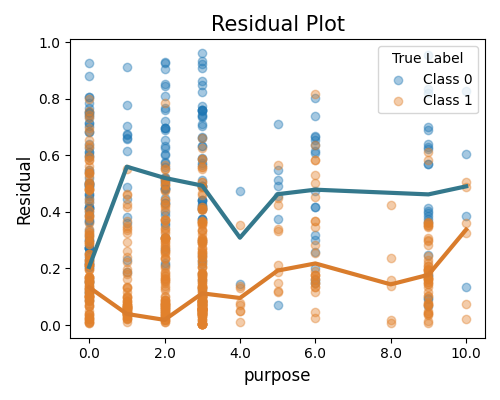

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="purpose",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

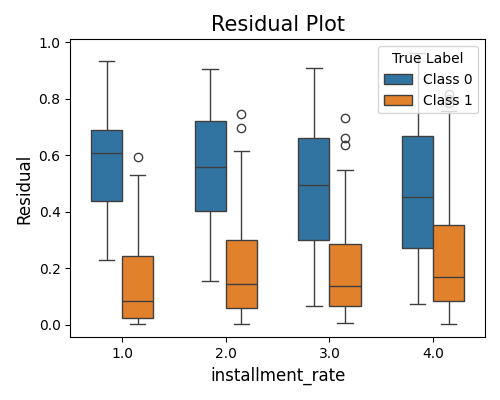

In [ ]:
exp.model_diagnose(model="XGB2", show="accuracy_residual", show_feature="installment_rate",
                   use_test=False, original_scale=True, figsize=(5, 4))

##Weakspot

###Status

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

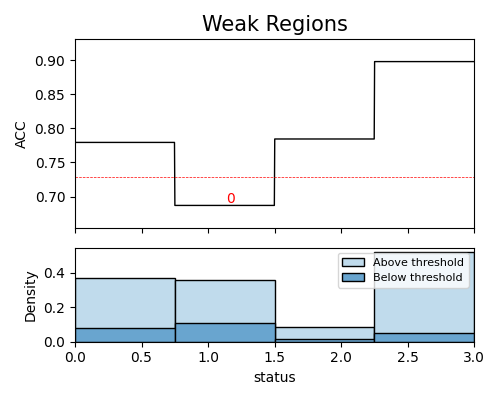

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,0.75,1.5,55,214,0.672727,0.686916,-0.014189


In [ ]:
status = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
status.data

###Duration

In [ ]:
duration = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["duration"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
duration.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Credit History

In [ ]:
credit_history = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["credit_history"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
credit_history.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Purpose

In [ ]:
purpose = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["purpose"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
purpose.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Installment Rate

In [ ]:
installment_rate = exp.model_diagnose(model="XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["installment_rate"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
installment_rate.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

##Overfit

###Status

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

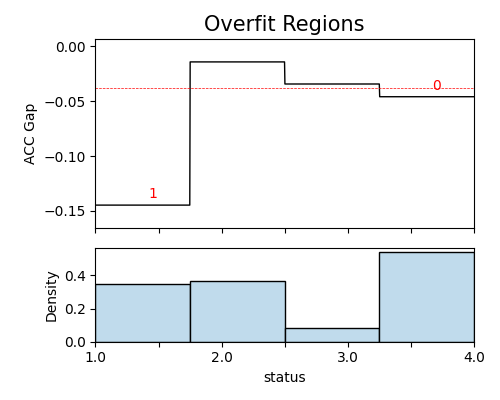

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,2.25,3.00,81,313,0.851852,0.897764,-0.045912
1,0.00,0.75,52,222,0.634615,0.779279,-0.144664


In [ ]:
overfit = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["status"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit.data

###Duration

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

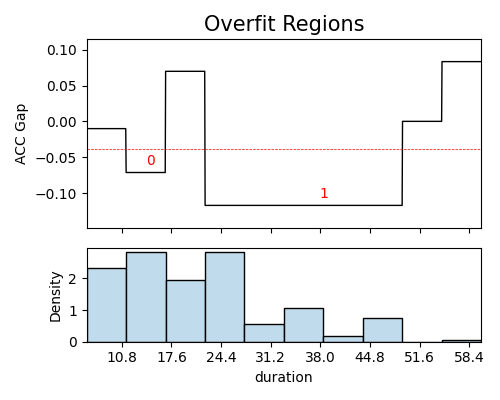

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.108824,0.188235,45,208,0.755556,0.826923,-0.071368
1,0.267647,0.664706,86,312,0.674419,0.791667,-0.117248


In [ ]:
overfit = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["duration"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit.data

###Credit History

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

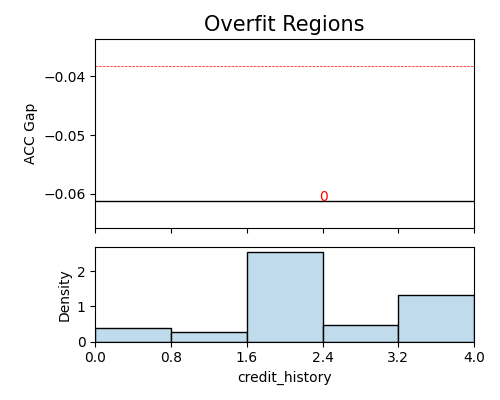

,[credit_history,credit_history),#Test,#Train,test_ACC,train_ACC,Gap
0,0.0,1.0,200,800,0.74,0.80125,-0.06125


In [ ]:
overfit = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["credit_history"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit.data

###Purpose

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

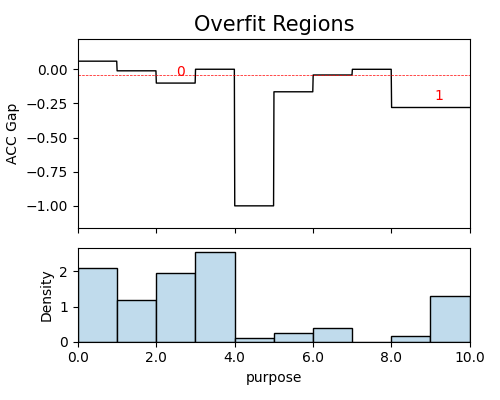

,[purpose,purpose),#Test,#Train,test_ACC,train_ACC,Gap
0,0.2,0.3,39,142,0.666667,0.767606,-0.100939
1,0.8,1.0,29,89,0.551724,0.831461,-0.279737


In [ ]:
overfit = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["purpose"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit.data

###Installment Rate

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

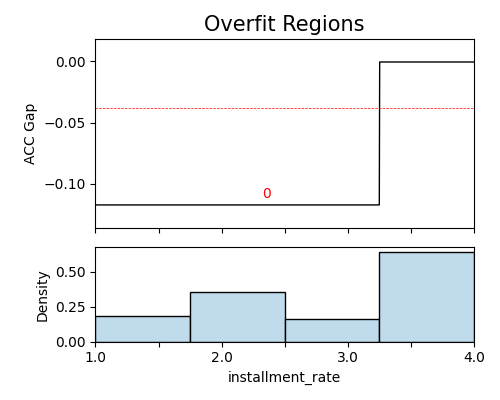

,[installment_rate,installment_rate),#Test,#Train,test_ACC,train_ACC,Gap
0,0.0,2.25,104,420,0.692308,0.809524,-0.117216


In [ ]:
overfit = exp.model_diagnose(model="XGB2", show="overfit", slice_method="histogram",
                             slice_features=["installment_rate"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit.data

##Reliability

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

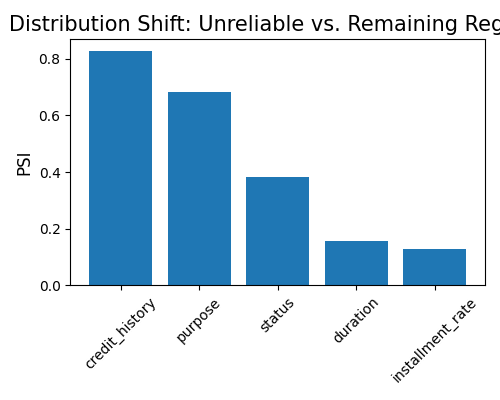

In [ ]:
exp.model_diagnose(model="XGB2", show="reliability_distance",
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))

##Robustness

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

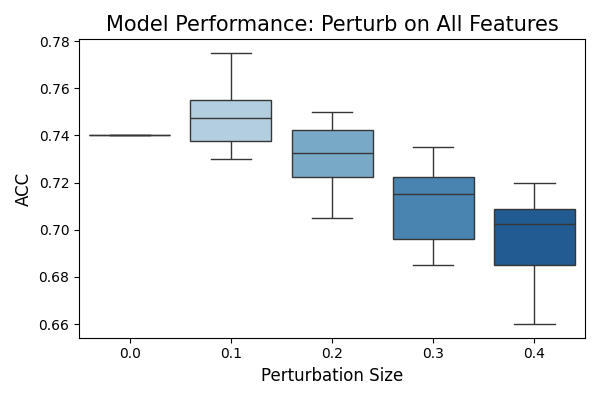

In [ ]:
exp.model_diagnose(model="XGB2", show="robustness_perf", perturb_method="quantile", figsize=(6, 4))

#Model 2 - Mono-XGB2 - Diagnosis

##Accuracy

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.7762,0.8201,0.8515,0.4573,0.1507
Test,0.7700,0.7815,0.8414,0.5283,0.1726
Gap,-0.0062,-0.0387,-0.0101,0.0710,0.0219


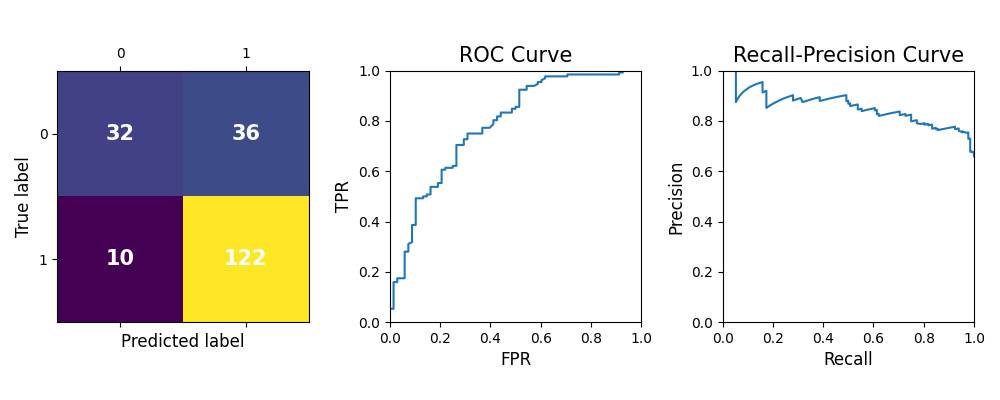

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_table")
exp.model_diagnose(model="Mono-XGB2", show="accuracy_plot", figsize=(10, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

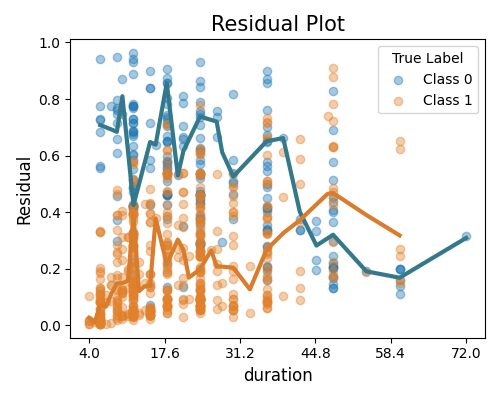

In [ ]:
#["duration", "status", "credit_history", "purpose", "installment_rate"]
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="duration",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

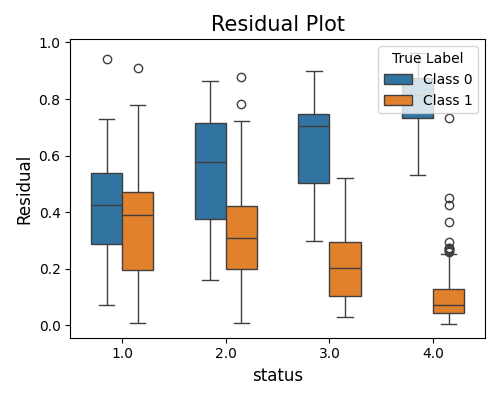

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="status",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

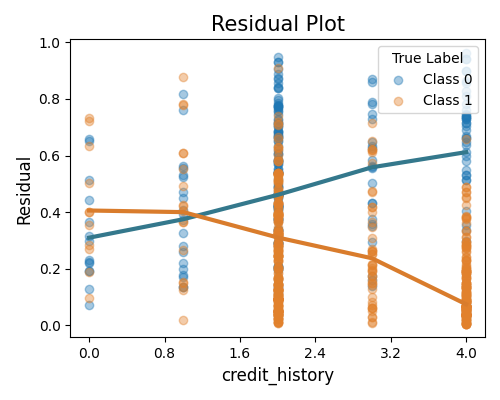

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="credit_history",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

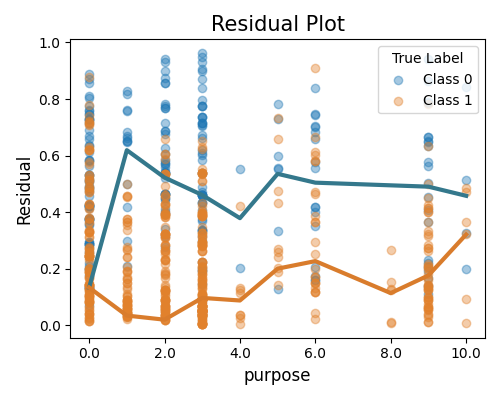

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="purpose",
                   use_test=False, original_scale=True, figsize=(5, 4))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

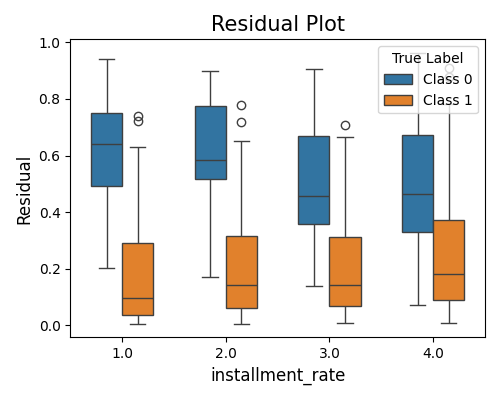

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="accuracy_residual", show_feature="installment_rate",
                   use_test=False, original_scale=True, figsize=(5, 4))

##Weakspot

###Status

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

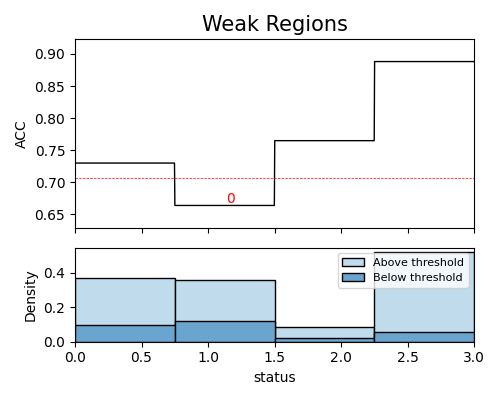

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,0.75,1.5,55,214,0.727273,0.663551,0.063721


In [ ]:
status_2 = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["status"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
status_2.data

###Duration

In [ ]:
duration_2 = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["duration"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
duration_2.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Credit History

In [ ]:
credit_history_2 = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["credit_history"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
credit_history_2.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Purpose


In [ ]:
purpose_2 = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["purpose"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
purpose_2.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

###Installment Rate

In [ ]:
installment_rate_2 = exp.model_diagnose(model="Mono-XGB2", show="weakspot", slice_method="histogram",
                             slice_features=["installment_rate"], threshold=1.1, min_samples=100,
                             return_data=True, figsize=(5, 4))
installment_rate_2.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No weak regions detected.</p>")

##Overfit

###Status

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

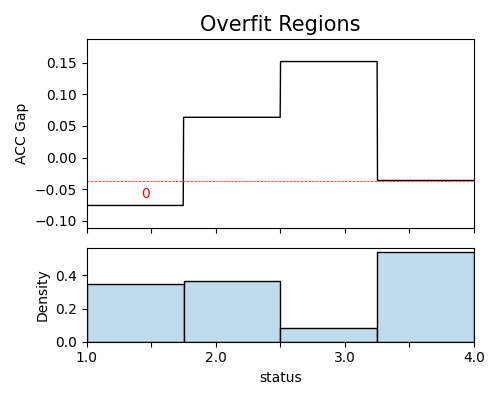

,[status,status),#Test,#Train,test_ACC,train_ACC,Gap
0,0.0,0.75,52,222,0.653846,0.72973,-0.075884


In [ ]:
overfit_2 = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["status"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit_2.data

###Duration

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

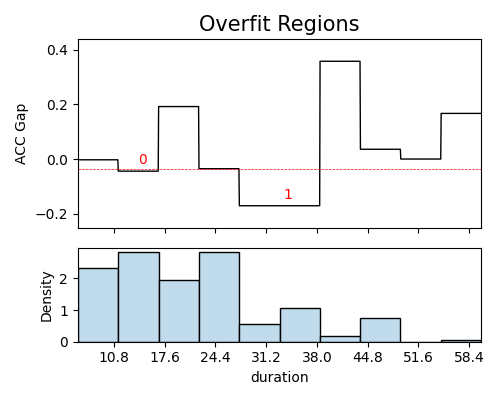

,[duration,duration),#Test,#Train,test_ACC,train_ACC,Gap
0,0.108824,0.188235,45,208,0.777778,0.822115,-0.044338
1,0.347059,0.505882,26,103,0.576923,0.747573,-0.170650


In [ ]:
overfit_2 = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["duration"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit_2.data

###Credit History

In [ ]:
overfit_2 = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["credit_history"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit_2.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>No overfit regions detected.</p>")

###Purpose

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

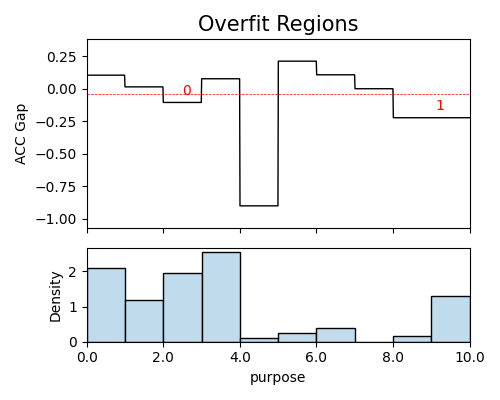

,[purpose,purpose),#Test,#Train,test_ACC,train_ACC,Gap
0,0.2,0.3,39,142,0.641026,0.746479,-0.105453
1,0.8,1.0,29,89,0.586207,0.808989,-0.222782


In [ ]:
overfit_2 = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["purpose"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit_2.data

###Intstallment Rate

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

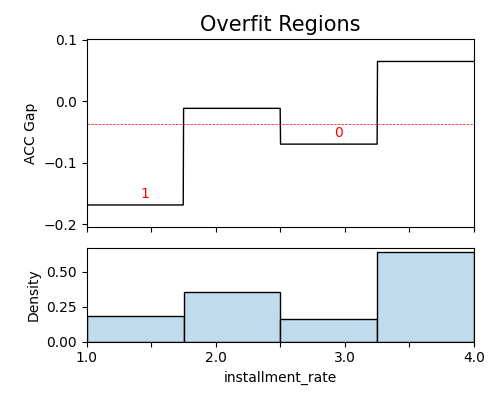

,[installment_rate,installment_rate),#Test,#Train,test_ACC,train_ACC,Gap
0,1.5,2.25,24,133,0.75000,0.819549,-0.069549
1,0.0,0.75,27,109,0.62963,0.798165,-0.168536


In [ ]:
overfit_2 = exp.model_diagnose(model="Mono-XGB2", show="overfit", slice_method="histogram",
                             slice_features=["installment_rate"], threshold=1.05, min_samples=20,
                             original_scale=True, return_data=True, figsize=(5, 4))
overfit_2.data

##Reliability

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

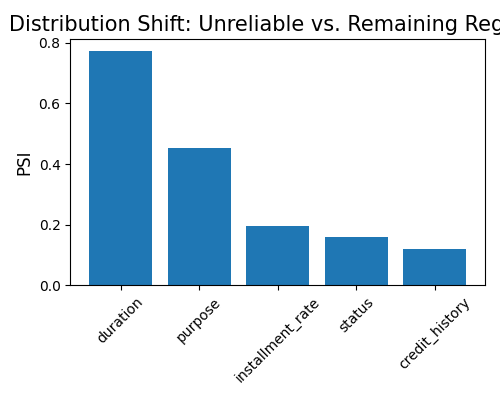

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="reliability_distance",
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))

##Robustness

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

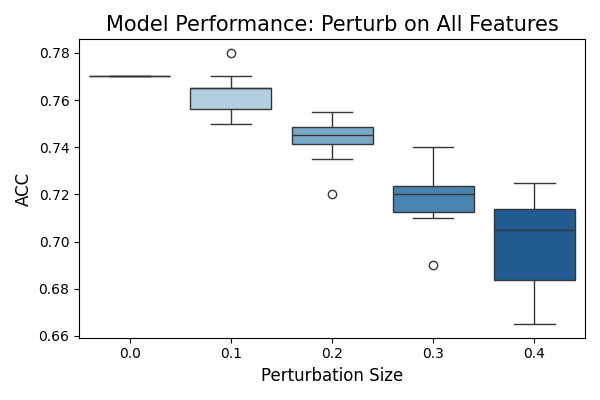

In [ ]:
exp.model_diagnose(model="Mono-XGB2", show="robustness_perf", perturb_method="quantile", figsize=(6, 4))